# Windows Function

1. Moving Average
2. Rolling Average
3. Ranking & percentile
4. Expanding Aggregation
5. Time Based Analysis
6. Comparative Analysis
7. Exponensital Moving Average
8. Risk Analysis
9. Lag & Lead Calculation


In [2]:
import pandas as pd
import seaborn as sns
from vega_datasets import data # random data

import warnings as wr
wr.filterwarnings('ignore')

In [3]:
dir(data) # Check available data

['7zip',
 'airports',
 'annual_precip',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2_concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare_dependencies',
 'flights_10k',
 'flights_200k',
 'flights_20k',
 'flights_2k',
 'flights_3m',
 'flights_5k',
 'flights_airport',
 'gapminder',
 'gapminder_health_income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa_electricity',
 'iris',
 'jobs',
 'la_riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal_2d',
 'obesity',
 'ohlc',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle_temps',
 'seattle_weather',
 'sf_temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment_across_industries',
 'uniform_2d',
 'us_10m',
 'us_employment',
 'us_state_capitals',
 'volcano',
 'weather',
 'weball26',
 'wheat',

In [4]:
stock = data.stocks()[['date','price']]
stock.head()

,date,price
0,2000-01-01,39.81
1,2000-02-01,36.35
2,2000-03-01,43.22
3,2000-04-01,28.37
4,2000-05-01,25.45


### Lag Function

In [5]:
# lag1 (Comparing today price with yesterday or price today vs yesterday)
stock["price_lag"] = stock["price"].shift(1)
stock.head()

,date,price,price_lag
0,2000-01-01,39.81,NaN
1,2000-02-01,36.35,39.81
2,2000-03-01,43.22,36.35
3,2000-04-01,28.37,43.22
4,2000-05-01,25.45,28.37


In [6]:
# lag2 (comparing todays price with 2 days before price)
stock['price_lag2'] = stock['price'].shift(2)
stock.head()

,date,price,price_lag,price_lag2
0,2000-01-01,39.81,NaN,NaN
1,2000-02-01,36.35,39.81,NaN
2,2000-03-01,43.22,36.35,39.81
3,2000-04-01,28.37,43.22,36.35
4,2000-05-01,25.45,28.37,43.22


In [7]:
# lag3 : comparing todays price with 3 days before price
stock['price_lag3'] = stock['price'].shift(3)
stock.head()

,date,price,price_lag,price_lag2,price_lag3
0,2000-01-01,39.81,NaN,NaN,NaN
1,2000-02-01,36.35,39.81,NaN,NaN
2,2000-03-01,43.22,36.35,39.81,NaN
3,2000-04-01,28.37,43.22,36.35,39.81
4,2000-05-01,25.45,28.37,43.22,36.35


### Lead Function

In [8]:
# lead 1 : comparing todays price with next day price
stock['price_lead'] = stock.price.shift(-1)
stock.head()


,date,price,price_lag,price_lag2,price_lag3,price_lead
0,2000-01-01,39.81,NaN,NaN,NaN,36.35
1,2000-02-01,36.35,39.81,NaN,NaN,43.22
2,2000-03-01,43.22,36.35,39.81,NaN,28.37
3,2000-04-01,28.37,43.22,36.35,39.81,25.45
4,2000-05-01,25.45,28.37,43.22,36.35,32.54


In [9]:
stock.tail()

,date,price,price_lag,price_lag2,price_lag3,price_lead
555,2009-11-01,199.91,188.50,185.35,168.21,210.73
556,2009-12-01,210.73,199.91,188.50,185.35,192.06
557,2010-01-01,192.06,210.73,199.91,188.50,204.62
558,2010-02-01,204.62,192.06,210.73,199.91,223.02
559,2010-03-01,223.02,204.62,192.06,210.73,NaN


In [10]:
stock.count() # count without Nan

date          560
price         560
price_lag     559
price_lag2    558
price_lag3    557
price_lead    559
dtype: int64

In [11]:
stock.isna().sum() # check any missing value

date          0
price         0
price_lag     1
price_lag2    2
price_lag3    3
price_lead    1
dtype: int64

In [12]:
stock.duplicated().sum()

0

# Rolling Average

In [13]:
# 5 days rolling average
stock["Price_rolling_averge"] = stock['price'].rolling(5).mean()
stock.head(10)

,date,price,price_lag,price_lag2,price_lag3,price_lead,Price_rolling_averge
0,2000-01-01,39.81,NaN,NaN,NaN,36.35,NaN
1,2000-02-01,36.35,39.81,NaN,NaN,43.22,NaN
2,2000-03-01,43.22,36.35,39.81,NaN,28.37,NaN
3,2000-04-01,28.37,43.22,36.35,39.81,25.45,NaN
4,2000-05-01,25.45,28.37,43.22,36.35,32.54,34.640
5,2000-06-01,32.54,25.45,28.37,43.22,28.40,33.186
6,2000-07-01,28.40,32.54,25.45,28.37,28.40,31.596
7,2000-08-01,28.40,28.40,32.54,25.45,24.53,28.632
8,2000-09-01,24.53,28.40,28.40,32.54,28.02,27.864
9,2000-10-01,28.02,24.53,28.40,28.40,23.34,28.378


In [14]:
# Verify1
stock.price[:5].mean() # Mean of top 5 values

34.64

In [15]:
# Verify2
stock["price"][1:6].mean()

33.18599999999999

In [16]:
# Verify2- lets round  up to 3 decimal points
round(stock["price"][1:6].mean(),3)

33.186

## Rolling Sum

In [17]:
# rolling sum for 2 days
stock["price_rolling_sum"] = stock.price.rolling(2).sum()
stock.head()

,date,price,price_lag,price_lag2,price_lag3,price_lead,Price_rolling_averge,price_rolling_sum
0,2000-01-01,39.81,NaN,NaN,NaN,36.35,NaN,NaN
1,2000-02-01,36.35,39.81,NaN,NaN,43.22,NaN,76.16
2,2000-03-01,43.22,36.35,39.81,NaN,28.37,NaN,79.57
3,2000-04-01,28.37,43.22,36.35,39.81,25.45,NaN,71.59
4,2000-05-01,25.45,28.37,43.22,36.35,32.54,34.64,53.82


In [18]:
# Find the max value of rolling 5 days
stock["price_rolling_max"] = stock["price"].rolling(5).max()
stock["price_rolling_min"] = stock["price"].rolling(5).min()
stock.head(10)

,date,price,price_lag,price_lag2,price_lag3,price_lead,Price_rolling_averge,price_rolling_sum,price_rolling_max,price_rolling_min
0,2000-01-01,39.81,NaN,NaN,NaN,36.35,NaN,NaN,NaN,NaN
1,2000-02-01,36.35,39.81,NaN,NaN,43.22,NaN,76.16,NaN,NaN
2,2000-03-01,43.22,36.35,39.81,NaN,28.37,NaN,79.57,NaN,NaN
3,2000-04-01,28.37,43.22,36.35,39.81,25.45,NaN,71.59,NaN,NaN
4,2000-05-01,25.45,28.37,43.22,36.35,32.54,34.640,53.82,43.22,25.45
5,2000-06-01,32.54,25.45,28.37,43.22,28.40,33.186,57.99,43.22,25.45
6,2000-07-01,28.40,32.54,25.45,28.37,28.40,31.596,60.94,43.22,25.45
7,2000-08-01,28.40,28.40,32.54,25.45,24.53,28.632,56.80,32.54,25.45
8,2000-09-01,24.53,28.40,28.40,32.54,28.02,27.864,52.93,32.54,24.53
9,2000-10-01,28.02,24.53,28.40,28.40,23.34,28.378,52.55,32.54,24.53


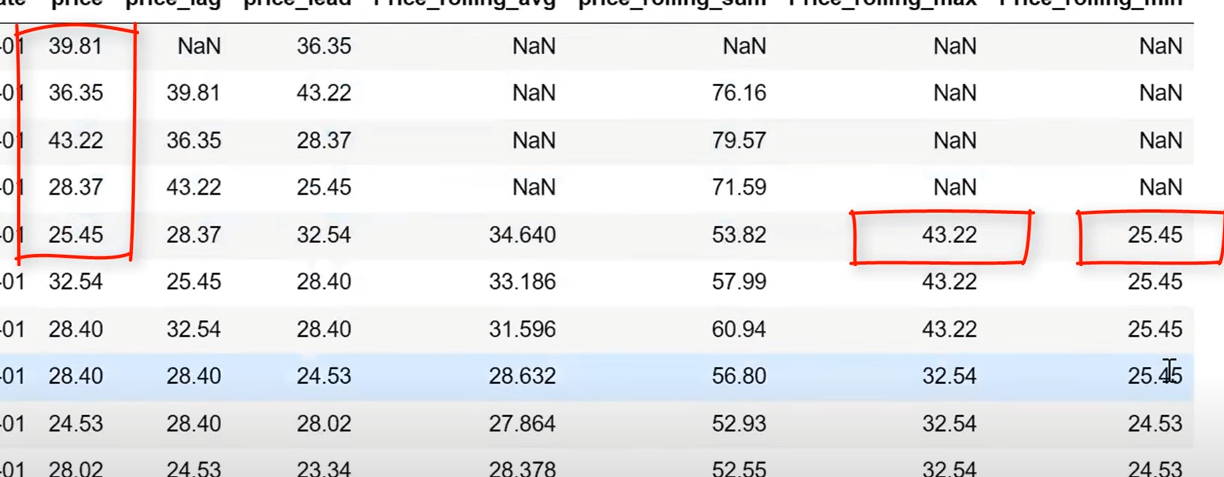

## How to change in stock price in Percentage

In [19]:
stock_2 = stock[['date', 'price']]
stock_2.head()

,date,price
0,2000-01-01,39.81
1,2000-02-01,36.35
2,2000-03-01,43.22
3,2000-04-01,28.37
4,2000-05-01,25.45


In [20]:
# How to change in stock price in Percentage
stock_2['price_percentage'] = stock['price'].pct_change(1)*100
stock_2.head()

,date,price,price_percentage
0,2000-01-01,39.81,NaN
1,2000-02-01,36.35,-8.691284
2,2000-03-01,43.22,18.899587
3,2000-04-01,28.37,-34.359093
4,2000-05-01,25.45,-10.292563


In [21]:
(36.35-39.81) / 39.81 * 100 # verifed1

-8.69128359708616

In [22]:
(43.22-36.35) / 36.35 *100 # verifed1

18.899587345254464

In [23]:
stock_2['price_perc_2'] = stock['price'].pct_change(2)*100
stock_2.head()

,date,price,price_percentage,price_perc_2
0,2000-01-01,39.81,NaN,NaN
1,2000-02-01,36.35,-8.691284,NaN
2,2000-03-01,43.22,18.899587,8.565687
3,2000-04-01,28.37,-34.359093,-21.953232
4,2000-05-01,25.45,-10.292563,-41.115224


In [24]:
(43.22-39.81) / 39.81 *100

8.56568701331323

In [25]:
(28.37-36.35) / 36.35	*100

-21.953232462173318

In [26]:
(39.81 * 8.691284/100)

3.4600001604

In [27]:
36.35	+ 3.4600001604

39.8100001604

## Comulative Sum

In [28]:
stock_2["expanding_sum"] = stock['price'].expanding().sum()
stock_2

,date,price,price_percentage,price_perc_2,expanding_sum
0,2000-01-01,39.81,NaN,NaN,39.81
1,2000-02-01,36.35,-8.691284,NaN,76.16
2,2000-03-01,43.22,18.899587,8.565687,119.38
3,2000-04-01,28.37,-34.359093,-21.953232,147.75
4,2000-05-01,25.45,-10.292563,-41.115224,173.20
...,...,...,...,...,...
555,2009-11-01,199.91,6.053050,7.855409,55580.77
556,2009-12-01,210.73,5.412436,11.793103,55791.50
557,2010-01-01,192.06,-8.859678,-3.926767,55983.56
558,2010-02-01,204.62,6.539623,-2.899445,56188.18


In [29]:
# Verification
var1 = 39.81
var2 = 39.81 + 36.35
var3 = 76.16 + 43.22
print(var1)
print(var2)
print(var3)

39.81
76.16
119.38


In [30]:
# Check few column
stock_2.iloc[:, 1::1]

,price,price_percentage,price_perc_2,expanding_sum
0,39.81,NaN,NaN,39.81
1,36.35,-8.691284,NaN,76.16
2,43.22,18.899587,8.565687,119.38
3,28.37,-34.359093,-21.953232,147.75
4,25.45,-10.292563,-41.115224,173.20
...,...,...,...,...
555,199.91,6.053050,7.855409,55580.77
556,210.73,5.412436,11.793103,55791.50
557,192.06,-8.859678,-3.926767,55983.56
558,204.62,6.539623,-2.899445,56188.18


## Comulative Min

In [31]:
stock_3 = stock[['date', 'price']]
stock_3.head()

,date,price
0,2000-01-01,39.81
1,2000-02-01,36.35
2,2000-03-01,43.22
3,2000-04-01,28.37
4,2000-05-01,25.45


In [32]:
# Comulative Min
stock_3["expanding_min"] = stock_3['price'].cummin()
stock_3

,date,price,expanding_min
0,2000-01-01,39.81,39.81
1,2000-02-01,36.35,36.35
2,2000-03-01,43.22,36.35
3,2000-04-01,28.37,28.37
4,2000-05-01,25.45,25.45
...,...,...,...
555,2009-11-01,199.91,5.97
556,2009-12-01,210.73,5.97
557,2010-01-01,192.06,5.97
558,2010-02-01,204.62,5.97


### Data prep

In [33]:
stock = stock[['date', 'price']].copy()
stock.head()

,date,price
0,2000-01-01,39.81
1,2000-02-01,36.35
2,2000-03-01,43.22
3,2000-04-01,28.37
4,2000-05-01,25.45


##### Difference from Mean (5-day window)

In [34]:
# Difference from Mean (5-day window)
stock['mean_diff'] = stock.price - stock.price.rolling(window=5).mean()
stock.head()

,date,price,mean_diff
0,2000-01-01,39.81,NaN
1,2000-02-01,36.35,NaN
2,2000-03-01,43.22,NaN
3,2000-04-01,28.37,NaN
4,2000-05-01,25.45,-9.19


In [35]:
# Difference from Mean (5-day window) - Check & Verify1
# calculting mean of first 5 value
stock['price'][:5].mean()

34.64

In [36]:
# Difference from Mean (5-day window) - Check & Verify1
# 5th day price - mean of last five
round((25.45 - 34.64),2)

-9.19

## Exponential Moving Average

In [37]:
span  = 10 # exponential moving average (10 day)
stock['ema'] = stock.price.ewm(span=10, adjust=False).mean()
stock.head()

,date,price,mean_diff,ema
0,2000-01-01,39.81,NaN,39.810000
1,2000-02-01,36.35,NaN,39.180909
2,2000-03-01,43.22,NaN,39.915289
3,2000-04-01,28.37,NaN,37.816146
4,2000-05-01,25.45,-9.19,35.567756


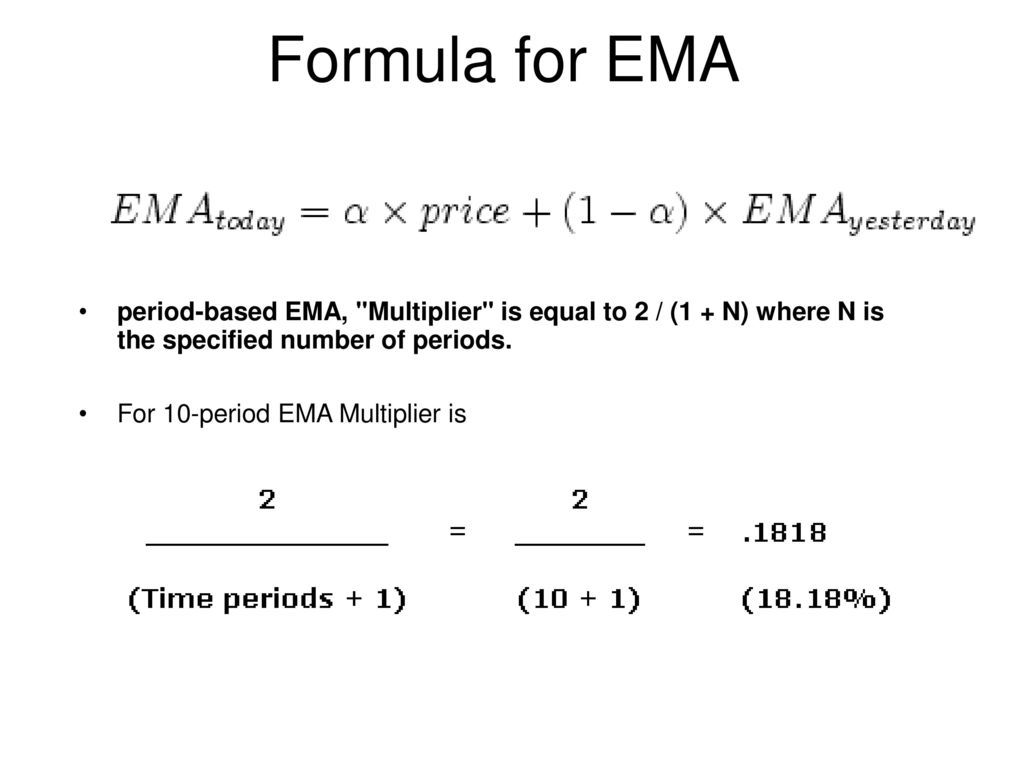

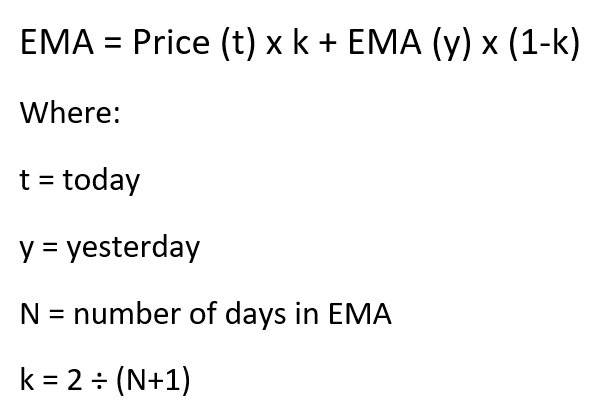

Current EMA= ((Price(current) - previous EMA)) X multiplier) + previous EMA. The important factor is the smoothing constant that = 2/(1+N) where N = the number of days. This means a 10-period EMA weights the most recent price 18.8%, a 20-day EMA 9.52 % and 50-day EMA 3.92% weight on the most recent day.
<b> Multiplier </b> smoothing factors, more weight to recent values then previous

<b> Exponential Moving Average </b>
- EMA = {(close - EMA(previous day)) x mulitplier} + EMA (previous day)
- initial EMA = SMA                   (SMA:  Simple Moving Average)
- Multiplier / Alpha = 2 / (1 + time period)


 Exponential Moving Average
- if 5 day moving average : multiplier: 2/(1+5)
- for 10 days : 2 / (1+10)
- for 7 days : 2 / (1+7)

- let say a list of data [1, 2, 3, 4, 5]
- moving averge for 5  = sum of all values / last 5 window = 15/5 = 3
- let say a list of data [1, 2, 3, 4, 5, 10]
- moving averge for 5  = sum of all values / last 5 window = (6+5+4+3+10) = 24/5 = 4.8

# Time Series Analysis and its Vialization

In [38]:
stock['price_per'] = stock.price.pct_change(1) * 100
stock.head()

,date,price,mean_diff,ema,price_per
0,2000-01-01,39.81,NaN,39.810000,NaN
1,2000-02-01,36.35,NaN,39.180909,-8.691284
2,2000-03-01,43.22,NaN,39.915289,18.899587
3,2000-04-01,28.37,NaN,37.816146,-34.359093
4,2000-05-01,25.45,-9.19,35.567756,-10.292563


In [39]:
stock.shape

(560, 5)

<Axes: xlabel='date', ylabel='price_per'>

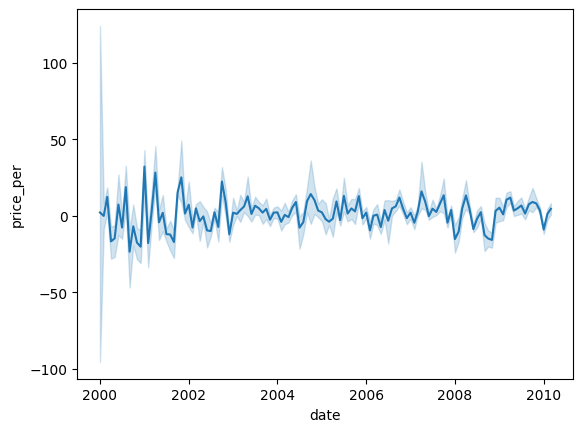

In [40]:
# Seaborn
sns.lineplot(x='date', y='price_per', data=stock)

In [41]:
# plotly
import plotly.express as px

In [42]:
# Price Percentage Chage
fig = px.line(stock.head(100), x='date', y='price_per', title='Price over time', template='plotly_dark')
fig.show()

In [46]:
stock["Price_rolling_averge"] = stock['price'].rolling(5).mean()

In [48]:
# Rolling average
fig = px.line(stock.head(100), x='date', y='Price_rolling_averge', title='Price_rolling_averge', template='gridon')
fig.show()